In [34]:
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import plotly

In [3]:
def Box_Muller(n):
    '''
    Funkcja generująca dane metodą Boxa-Mullera
    '''
    import numpy as np
    u1=np.random.random(int(n))
    u2=np.random.random(int(n))
    r=np.sqrt(-2*np.log(u1))
    theta=2*np.pi*u2
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    return x,y

In [56]:
def LCG(n):
    '''
    Funkcja generująca dane za pomocą liniowego generatora kongruentnego
    '''
    import random
    a=5**5
    c=0
    m=(2**35)-31
    seed=[random.randint(1,101)]*int(n)
    for i in range(n):
        seed[i]=(a*seed[i-1]+c)%m
    return seed
    

In [57]:
def FCG(n):
    '''
    Funkcja generująca dane za pomocą generatora Fibonacciego
    '''
    m=2**31
    import numpy as np
    if n<100:
        p=floor(n/2)
        q=floor(n/3)
        seed=np.random.random(int(n))
        for i in range(int(n)):
            seed[i]=(seed[i-p]+seed[i-q])%m
        return seed
    else:
        p=55
        q=24
        seed=np.random.random(int(n))
        for i in range(n):
            seed[i]=(seed[i-p]+seed[i-q])%m
        return seed

In [37]:
def von_Neumann(n):
    '''
    Funkcja generująca dane metodą eliminacji von Neumanna
    '''
    import numpy as np
    from scipy import stats
    #print("Prosimy o cierpliwość. Funkcja w takcie tworzenia")
    r1=np.random.random(int(n))
    r2=np.random.random(int(n))/n
    mu, sigma=stats.norm.fit(r1)
    norm=np.random.normal(mu, sigma,n)
    norm_max=np.max(norm)
    x=[]
    for i in range(n):
        if r2[i]<=(norm[i]/norm_max):
            x.append(r1[i])
        else:
            von_Neumann(n-i)
    return x

In [38]:
def norm_table(x):
    '''
    Funkcja zwracająca data frame z wartościami p-value dla testów sprawdzających normalność rozkładu
    '''
    from scipy import stats 
    import pandas as pd
    #D'Agostino-Pearson
    stat_x, p_x_dap=stats.normaltest(x)
    #Kołomogorov-Smirnov
    D_x, p_x_ks=stats.kstest(x, 'norm')
    #Chi^2
    chisq_x, p_x_chi=stats.chisquare(x)
    #Shapiro-Wilk
    W_x, p_x_sh=stats.shapiro(x)
            
    p_value={"p-value":[p_x_dap, p_x_ks, p_x_chi, p_x_sh]}
    df=pd.DataFrame(data=p_value, index=["D'Agostino-Pearson", "Kolmogorov-Smirnov", 
                                         "Chi^2", "Shapiro-Wilk"])
    return df

In [39]:
def uniform_table(x):
    '''
    Funkcja zwracająca data frame z wartościami p-value dla testów sprawdzających jednostajność rozkładu
    '''
    from scipy import stats 
    import pandas as pd
    #Kołomogorov-Smirnov
    D_x, p_x_ks=stats.kstest(x, stats.uniform(loc=0.0, scale=100.0).cdf)
    #Chi^2
    #chisq_x, p_x_chi=stats.chisquare(x,stats.uniform(loc=0.0, scale=100.0).cdf)
            
    p_value={"p-value":[p_x_ks]}
    df=pd.DataFrame(data=p_value, index=["Kolmogorov-Smirnov-jednorodny"])
    return df

In [59]:
def testy_norm(start=100, step=3, stop=0, gen='BM'):
    '''
    Funkcja stworzona do przeprowadzenia testów normalności na danych wygenerowanych psedudolosowo 
    przez wybrany generator losowy.
    Funkcja przyjmuje:
    - gen - string, rodzaj generatora: LCG (liniowy generator kongruentny), FCG (generator Fibonacciego), 
                        BM (metoda Boxa-Mullera), VN (metoda elimincaji). Domyślnym gereratorem jest metoda Boxa-Mullera
    - start - int, początkowa liczba próbek. Domyślna wartość 100.
    - stop - int, ilość kroków pomiędzy początkową i końcową liczbą próbek, w jakich chcemy sprawdzić czy dla 
            rozkładów normalność zależy od ilości próbek. Domyślna wartość 0.
    - step - int, końcowa liczba próbek. Domyślna wartość 3.
    Fnkcja zwraca:
    - df - data frame, wartości p-value dla testów nromalności - Kołomogrova-Smirnova, Lillieforsa, Shapiro-Wilka,
        D'Agostino-Persona, Chi^2
    - x - lista, wynik stworzone przez generator
    '''
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    gen=gen.lower()
    
    if step==0:
        print('Parametr step nie może być równy 0')
        xx=0
        df=0
    elif stop!=0 and step !=0:
        probe=np.linspace(start, stop, step)
        if gen=='bm':
            df_app=[]
            xx=[]
            for i in probe:
                (x,y)=Box_Muller(i)
                xy=[x,y]
                df_x=norm_table(x)
                df_x=df_x.rename(index=str, columns={'p-value':'p-value_x_{}'.format(i)})
                df_y=norm_table(y)
                df_y=df_y.rename(index=str, columns={'p-value':'p-value_y_{}'.format(i)})
                df_xy=pd.concat([df_x, df_y], axis=1)
                df_xj=uniform_table(x)
                df_xj=df_xj.rename(index=str, columns={'p-value':'p-value_x_{}'.format(i)})
                df_yj=uniform_table(y)
                df_yj=df_yj.rename(index=str, columns={'p-value':'p-value_y_{}'.format(i)})
                df_xyj=pd.concat([df_xj, df_yj],axis=1)
                df_xy=pd.concat([df_xy,df_xyj])
                df_app.append(df_xy)
                xx.append(xy)
            df=pd.concat(df_app, axis=1, sort=False)
        elif gen=='lcg':
            df_app=[]
            xx=[]
            for i in probe:
                x=LCG(start)
                df_x=norm_table(x)
                df_x=df_x.rename(index=str, columns={'p-value':'p-value_{}'.format(i)})
                df_xj=uniform_table(x)
                df_xj=df_xj.rename(index=str, columns={'p-value':'p-value_{}'.format(i)})
                df_x=pd.concat([df_x, df_xj])
                df_app.append(df_x)
                xx.append(x)
            df=pd.concat(df_app, axis=1)
        elif gen=='fcg':
            df_app=[]
            xx=[]
            for i in probe:
                x=FCG(start)
                df_x=norm_table(x)
                df_x=df_x.rename(index=str, columns={'p-value':'p-value_{}'.format(i)})
                df_xj=uniform_table(x)
                df_xj=df_xj.rename(index=str, columns={'p-value':'p-value_{}'.format(i)})
                df_x=pd.concat([df_x, df_xj])
                df_app.append(df_x)
                xx.append(x)
            df=pd.concat(df_app, axis=1)
        elif gen=='vn':
            df_app=[]
            xx=[]
            for i in probe:
                x=von_Neumann(start)
                df_x=norm_table(x)
                df_x=df_x.rename(index=str, columns={'p-value':'p-value_{}'.format(i)})
                df_xj=uniform_table(x)
                df_xj=df_xj.rename(index=str, columns={'p-value':'p-value_{}'.format(i)})
                df_x=pd.concat([df_x, df_xj])
                df_app.append(df_x)
                xx.append(x)
            df=pd.concat(df_app, axis=1)
        
    else:
        if gen=='bm':
            (x,y)=Box_Muller(start)
            xx=[x,y]
            df_x=norm_table(x)
            df_x=df_x.rename(index=str, columns={'p-value':'p-value_x'})
            df_y=norm_table(y)
            df_y=df_y.rename(index=str, columns={'p-value':'p-value_y'})
            df_xj=uniform_table(x)
            df_xj=df_xj.rename(index=str, columns={'p-value':'p-value_x'})
            df_yj=uniform_table(y)
            df_yj=df_yj.rename(index=str, columns={'p-value':'p-value_y'})
            df_xyj=pd.concat([df_xj, df_yj],axis=1)
            df_xy=pd.concat([df_x, df_y], axis=1)
            df=pd.concat([d_xy, df_xyj])
        elif gen=='lcg':
            x=LCG(start)
            xx=x
            df=norm_table(x)
            dfu=uniform_table(x)
            df=pd.concat([df,dfu])
        elif gen=='fcg':
            x=FCG(start)
            xx=x
            df=norm_table(x)
            dfu=uniform_table(x)
            df=pd.concat([df, dfu])
        elif gen=='vn':
            x=von_Neumann(start)
            xx=x
            df=norm_table(x)
            dfu=uniform_table(x)
            df=pd.concat([df,dfu])
    return xx, df

In [60]:
def wykres_hist(X):
    '''
    Funkcja rysująca histogram z wygenerowanych danych wraz z dopasowaniem rozkładu normalnego.
    Dla generatora bm dane wgrywamy pojedynczo, np. jako x[0] albo x[1]
    '''
    import matplotlib.pyplot as plt
    from scipy import stats
    mu, sigma = stats.norm.fit(x)
    count, bins, ignored = plt.hist(x, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
    plt.title("Histogram rozkładu z dopasowaniem rozkładu normalego")

    return plt.show()

In [61]:
def wykres_ecdf(x):
    '''
    Funkcja rysująca estymatory dystybuanty i gęstości z wygenerowanych danych porównujących je z dystrybuantą i gęstością
    rozkładu normalego dopasowanego do wygenerowanego rozkładu.
    Dla generatora bm dane wgrywamy pojedynczo, np. jako x[0] albo x[1]
    '''
    import numpy as np
    from scipy import stats
    from statsmodels.distributions.empirical_distribution import ECDF
    import matplotlib.pyplot as plt 
    import seaborn as sns
    
    m, s=stats.norm.fit(x)
    norm=np.random.normal(m, s,len(x))
    ecdf=ECDF(norm)
    
    plt.subplot(121)
    ecdf_x=sorted(ecdf.x)
    min_x=ecdf_x[1]
    max_x=max(ecdf.x)
    plt.step(ecdf.x, ecdf.y, 'k-')
    
    t1=np.linspace(min_x, max_x, 100)
    t2=stats.norm.cdf(t1, loc=m, scale=s)
    t3=stats.norm.pdf(t1, loc=m, scale=s)
    plt.plot(t1, t2, "b--")
    
    plt.subplot(122)
    plt.title("Wykresy estymatorów rozkładu w porównaniu z rokładem normalnym")
    sns.distplot(x, bins=30, color="k")
    plt.plot(t1,t3, "b--")
    return plt.show()

In [62]:
def wykres_Q(x):
    '''
    Funkcja rysująca wykres kwantylowy dla wygenerowanych danych
    '''
    import matplotlib.pyplot as plt 
    from scipy import stats
    
    stats.probplot(x, dist=stats.norm, plot=plt)
    plt.title("Wykres kwantylowy")
    
    return plt.show()

In [63]:
def wykresy(x):
    '''
    Funkcja zbierająca wszystkie powyższe wykresy (histogram, dystrybuanę i gęstość oraz wykres kwantylowy) w jeden subplot
    '''
    import matplotlib.pyplot as plt 
    from scipy import stats
    import matplotlib.gridspec as gridspec
    
    fig=plt.figure(figsize=(7, 15))
    gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[1, 1, 2])
    ax0=fig.add_subplot(gs[0,:])
    wykres_hist(x)
    
    ax1=fig.add_subplot(gs[1,:])
    wykres_ecdf(x)
    
    ax2=fig.add_subplot(gs[2,:])
    wykres_Q(x)
    
    plt.tight_layout()
    return plt.show()

In [69]:
#Generator rozkładu,
#Do wyboru: gen= 'fcg'|'lcg'|'bm'|'vn', start=(int), stop=(int), step=(int)
#więcej informacji po wpisaniu: help(testy_norm)
(x, df) = testy_norm(gen='vn')

In [70]:
#Tabelka z wartościami p-value dla wygenerowanego rozkładu
df

,p-value
D'Agostino-Pearson,5.063042e-04
Kolmogorov-Smirnov,4.137810e-22
Chi^2,1.000000e+00
Shapiro-Wilk,2.547705e-03
Kolmogorov-Smirnov-jednorodny,1.933326e-188


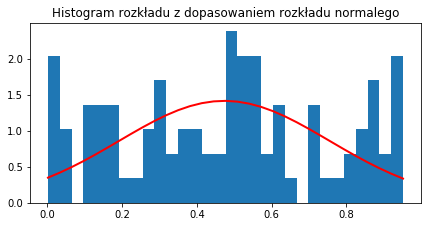

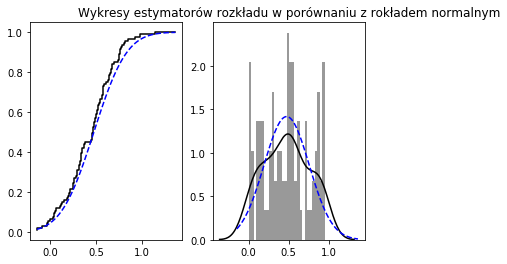

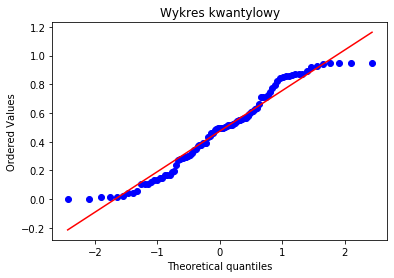

<Figure size 432x288 with 0 Axes>

In [71]:
#Rysowanie wykresów
#dla rozkładu Boxa-Mullera używamy x[0] albo x[1]
wykresy(x)